In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

## Read in Data

In [31]:
df = pd.read_csv('./data/final.csv')

In [32]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Year
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,1990.0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,1990.0
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,1990.0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,1990.0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,1990.0


## Train-Test-Split

In [33]:
X = df.drop(columns = ['track', 'artist', 'uri', 'target'])
y = df['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [35]:
y.value_counts(normalize = True)

0    0.5
1    0.5
Name: target, dtype: float64

## Model 1: Simple Logistic Regression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.5447579664315252


## Model 2: Simple Logstic Regression + Standard Scaling

In [39]:
lr = LogisticRegression()

In [40]:
# Create a StandardScaler object
sc = StandardScaler()

# Standardize the training and test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [47]:
pred = lr.predict(X_test_sc)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


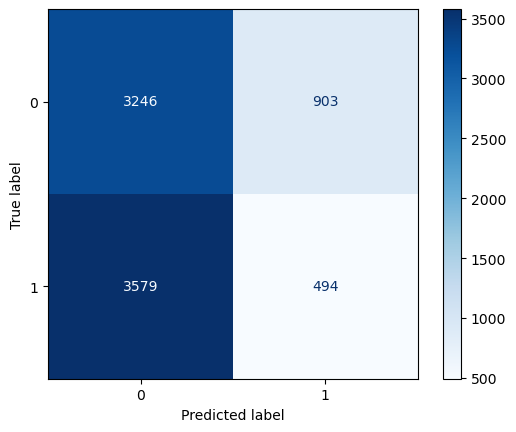

In [48]:
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', values_format='d');

In [49]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.6558206796818511


In [51]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.7419119435660423
F1 Score: 0.7610360360360361


## Model 2: GridSearched Logistic Regression

In [56]:
lr = LogisticRegression()

In [57]:
# Create a StandardScaler object
sc = StandardScaler()

# Standardize the training and test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [58]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}


In [59]:
clf = GridSearchCV(lr, params, cv =5)

In [60]:
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [61]:
print('Best hyperparameters:', clf.best_params_)
print('Best score:', clf.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7402993436908906


In [62]:
clf = GridSearchCV(lr, {'penalty': ['l1'], 'C': [1], 'solver': ['liblinear']}, cv=5)

In [63]:
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1], 'penalty': ['l1'], 'solver': ['liblinear']})

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


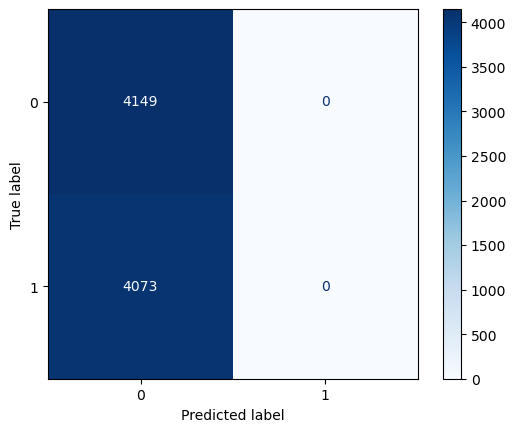

In [67]:
pred = clf.predict(X_test_sc)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d');

In [68]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.741790318657261
F1 Score: 0.7608964973533056


This accuracy score is higher than baseline at 74%.